FEATURES AND PARAMETERS SELECTION
=================================

# 1. Preprocess dataset

In [33]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
feature_col_names = [
                        'key',
                        'energy',
                        'liveliness',
                        'tempo',
                        'speechiness',
                        'acousticness',
                        'instrumentalness',
                        'time_signature',
                        'duration',
                        'loudness',
                        'valence',
                        'danceability',
                        'mode',
                        'time_signature_confidence',
                        'tempo_confidence',
                        'key_confidence',
                        'mode_confidence'
                    ]
# df_features = pd.DataFrame(df_master_song_filtered_bal['audio_features'].tolist(), columns=feature_col_names)

In [35]:
def read_song_list(file_name):
    df = pd.read_json(file_name)
    df['genres'] = df['genres'].apply(' '.join)
    df['genres'] = df['genres'].map(lambda x: x.split(':')[0] if len(x) > 0 else x)
    return df

df_master_song = read_song_list('MasterSongList.json')
df_master_song.head()

,_id,album,artist,audio_features,context,decades,genres,lyrics_features,moods,name,new_context,picture,recording_id,sub_context,yt_id,yt_views
0,{u'$oid': u'52fdfb440b9398049f3d7a8c'},Gangnam Style (강남스타일),PSY,"[11, 0.912744, 0.083704, 132.069, 0.293137, 0....",[work out],[],pop,"[oppa, gangnam, style, gangnam, style, najeneu...","[energetic, motivational]",Gangnam Style (강남스타일),work out,http://images.musicnet.com/albums/073/463/405/...,50232.0,[working out: cardio],9bZkp7q19f0,2450112089
1,{u'$oid': u'52fdfb3d0b9398049f3cbc8e'},Native,OneRepublic,"[6, 0.745704, 0.119955, 100.008, 0.046255, 0.0...",[energetic],[2012],pop,"[lately, i, ve, been, i, ve, been, losing, sle...",[happy],Counting Stars,energetic,http://images.musicnet.com/albums/081/851/887/...,5839.0,[energy boost],hT_nvWreIhg,1020297206
2,{u'$oid': u'52fdfb420b9398049f3d3ea5'},Party Rock Anthem,LMFAO,"[5, 0.709932, 0.231455, 130.03, 0.121741, 0.03...","[energetic, energetic, energetic, energetic]",[],,"[party, rock, yeah, woo, let, s, go, party, ro...","[happy, celebratory, rowdy]",Party Rock Anthem,housework,http://images.musicnet.com/albums/049/414/127/...,52379.0,"[energy boost, pleasing a crowd, housework, dr...",KQ6zr6kCPj8,971128436
3,{u'$oid': u'52fdfb410b9398049f3d1eac'},Gentleman,PSY,"[3, 0.705822, 0.053292, 126.009, 0.126016, 0.0...","[party, party, party, party, party, party]",[2010s],dance,"[alagamun, lan, weh, wakun, heya, hanun, gon, ...","[happy, energetic, celebratory]",Gentleman,energetic,http://images.musicnet.com/albums/082/950/461/...,12353.0,"[driving in the left lane, energy boost, girls...",ASO_zypdnsQ,892096527
4,{u'$oid': u'52fdfb400b9398049f3d0b19'},On The Floor,Jennifer Lopez,"[3, 0.741757, 0.072774, 129.985, 0.051255, 0.0...","[party, party]",[2000s],reggaeton,"[j, lo, the, other, side, out, my, mine, it, s...",[energetic],On The Floor,work out,http://images.musicnet.com/albums/050/131/765/...,29502.0,"[working out: cardio, dance party: sweaty]",t4H_Zoh7G5A,873285189


In [36]:
def filter_genres(df, arg):
    if len(arg) <= 0:
        return df.copy()
    filtered_result = pd.Series(np.zeros(df.shape[0], dtype=bool))
    for genre in arg:
        filtered = df['genres'] == genre
        filtered_result |= filtered
    return df[filtered_result].copy().reset_index(drop=True)

df_master_song_filted_genres = filter_genres(df_master_song, ['jazz', 'dance', 'rock', 'rap'])
df_master_song_filted_genres.head()

,_id,album,artist,audio_features,context,decades,genres,lyrics_features,moods,name,new_context,picture,recording_id,sub_context,yt_id,yt_views
0,{u'$oid': u'52fdfb410b9398049f3d1eac'},Gentleman,PSY,"[3, 0.705822, 0.053292, 126.009, 0.126016, 0.0...","[party, party, party, party, party, party]",[2010s],dance,"[alagamun, lan, weh, wakun, heya, hanun, gon, ...","[happy, energetic, celebratory]",Gentleman,energetic,http://images.musicnet.com/albums/082/950/461/...,12353.0,"[driving in the left lane, energy boost, girls...",ASO_zypdnsQ,892096527
1,{u'$oid': u'52fdfb410b9398049f3d1ec5'},Scream & Shout,will.i.am,"[0, 0.616411, 0.171423, 130.009, 0.059577, 0.0...","[party, party, party, party, party, party]",[2010s],dance,"[bring, the, action, when, you, hear, this, in...","[happy, energetic, celebratory]",Scream & Shout,energetic,http://images.musicnet.com/albums/077/173/911/...,29594.0,"[driving in the left lane, energy boost, girls...",kYtGl1dX5qI,513614717
2,{u'$oid': u'52fdfb3d0b9398049f3cc6f6'},Use Your Illusion I (Parental Advisory),Guns N' Roses,"[11, 0.398953, 0.17064, 77.821, 0.033343, 0.00...","[energetic, energetic]",[],rock,"[when, i, look, into, your, eyes, i, can, see,...",[trippy],November Rain,untroubled,http://images.musicnet.com/albums/000/695/013/...,50983.0,"[energy boost, hanging out in the man cave]",8SbUC-UaAxE,464476055
3,{u'$oid': u'52fdfb410b9398049f3d1bf3'},Bangarang EP,Skrillex,"[7, 0.728367, 0.84481, 112.328, 0.307629, 0.00...","[party, party]",[],dance,"[shout, to, all, my, lost, boys, sh, sh, sh, s...",[celebratory],Bangarang (Feat. Sirah),party,http://images.musicnet.com/albums/062/721/483/...,40965.0,"[house party, dance party: sweaty]",YJVmu6yttiw,370548179
4,{u'$oid': u'52fdfb3d0b9398049f3cbcdf'},Toxicity,System Of A Down,"[7, 0.906388, 0.130576, 127.438, 0.122818, 0.0...","[energetic, energetic]",[],rock,"[wake, up, wake, up, grab, a, brush, and, put,...","[aggressive, rowdy]",Chop Suey!,energetic,http://images.musicnet.com/albums/013/354/909/...,50574.0,"[energy boost, gaming ]",CSvFpBOe8eY,340810887


In [37]:
# Only get required column to make sure dropna isn't affected by the others
df_master_song_filted_genres_mood_audio = df_master_song_filted_genres.loc[:, ['genres', 'audio_features', 'moods']]

# Using one hot encoding to extract features from 'autio_features' and 'moods'
df_features = pd.DataFrame(df_master_song_filted_genres_mood_audio.loc[:,'audio_features'].tolist(), columns=feature_col_names)
df_moods = df_master_song_filted_genres_mood_audio.loc[:, 'moods'].str.join(',').str.get_dummies(sep=',')

# Create feature along with lable
df_features_moods = pd.concat([df_master_song_filted_genres_mood_audio['genres'],df_features, df_moods], axis=1)
df_features = pd.concat([df_master_song_filted_genres_mood_audio['genres'], df_features], axis=1)

# Drop nan
df_features_moods.dropna(inplace=True)
df_features.dropna(inplace=True)

print(df_features.shape)
print(df_features_moods.groupby('genres').count().iloc[:,0])

(12776, 18)
genres
dance    2000
jazz     1889
rap      2452
rock     6435
Name: key, dtype: int64


## Normalize data

In [38]:
from sklearn.preprocessing import StandardScaler
df_features_scaled = StandardScaler().fit_transform(df_features.iloc[:,1:])
df_features_moods_scaled = StandardScaler().fit_transform(df_features_moods.iloc[:, 1:])

## Train test split

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features_scaled, 
                                                    np.ravel(df_features.iloc[:, 0]), 
                                                    test_size=0.3, random_state=101)
X_train_moods, X_test_moods, y_train_moods, y_test_moods = train_test_split(
    df_features_moods_scaled, 
    np.ravel(df_features_moods.iloc[:, 0]), 
    test_size=0.3, random_state=101)

# 2. Manual select parameter

In [135]:
from sklearn.metrics import classification_report
from nltk.metrics import ConfusionMatrix
def cls_report(estimator, X, y, verbose=True):
    y_predict = estimator.predict(X)
    cls_report = classification_report(y, y_predict)
    if verbose:
        print(cls_report)
        print(ConfusionMatrix(list(y), list(y_predict)))
    return cls_report

## Logistic Regression
```python
solver='saga'
multi_class='multinomial'
```

In [49]:
from sklearn.linear_model import LogisticRegression
# audio_features
lr_audio = LogisticRegression(solver='saga', multi_class='multinomial')
lr_audio.fit(X_train, y_train)
cls_report(lr_audio, X_test, y_test)

# audio_features + moods
lr_audio_moods = LogisticRegression(solver='saga', multi_class='multinomial')
lr_audio_moods.fit(X_train_moods, y_train_moods)
cls_report(lr_audio_moods, X_test_moods, y_test_moods)

             precision    recall  f1-score   support

      dance       0.68      0.60      0.64       642
       jazz       0.74      0.71      0.72       535
        rap       0.80      0.72      0.76       744
       rock       0.81      0.88      0.84      1912

avg / total       0.78      0.78      0.78      3833

      |    d                |
      |    a    j         r |
      |    n    a    r    o |
      |    c    z    a    c |
      |    e    z    p    k |
------+---------------------+
dance | <387>   7   88  160 |
 jazz |   12 <382>  12  129 |
  rap |   85   16 <536> 107 |
 rock |   83  114   37<1678>|
------+---------------------+
(row = reference; col = test)

             precision    recall  f1-score   support

      dance       0.85      0.82      0.83       642
       jazz       0.89      0.90      0.89       535
        rap       0.84      0.85      0.85       744
       rock       0.93      0.93      0.93      1912

avg / total       0.89      0.89      0.89      383

## Support Vector Machine
```python
C=1
gamma=1
```

In [52]:
from sklearn.svm import SVC
# audio_features
svm_audio = SVC(C=1, gamma=1)
svm_audio.fit(X_train, y_train)
cls_report(svm_audio, X_test, y_test)

# audio_features + moods
svm_audio_moods = SVC(C=1, gamma=1)
svm_audio_moods.fit(X_train_moods, y_train_moods)
cls_report(svm_audio_moods, X_test_moods, y_test_moods)

             precision    recall  f1-score   support

      dance       0.81      0.12      0.20       642
       jazz       0.67      0.00      0.01       535
        rap       0.92      0.17      0.29       744
       rock       0.53      0.99      0.69      1912

avg / total       0.67      0.55      0.44      3833

      |    d                |
      |    a    j         r |
      |    n    a    r    o |
      |    c    z    a    c |
      |    e    z    p    k |
------+---------------------+
dance |  <75>   1    9  557 |
 jazz |    .   <2>   .  533 |
  rap |   10    . <130> 604 |
 rock |    8    .    2<1902>|
------+---------------------+
(row = reference; col = test)

             precision    recall  f1-score   support

      dance       1.00      0.01      0.02       642
       jazz       0.00      0.00      0.00       535
        rap       1.00      0.02      0.03       744
       rock       0.50      1.00      0.67      1912

avg / total       0.61      0.50      0.34      383

/home/dks/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Random Forest
```python
n_estimators=5
min_samples_split=2
max_features='log2'
```

In [55]:
from sklearn.ensemble import RandomForestClassifier
# audio_features
rfc_audio = RandomForestClassifier(n_estimators=5, min_samples_split=2, max_features='log2')
rfc_audio.fit(X_train, y_train)
cls_report(rfc_audio, X_test, y_test)

# audio_features + moods
rfc_audio_moods = RandomForestClassifier(n_estimators=5, min_samples_split=2, max_features='log2')
rfc_audio_moods.fit(X_train_moods, y_train_moods)
cls_report(rfc_audio_moods, X_test_moods, y_test_moods)

             precision    recall  f1-score   support

      dance       0.64      0.62      0.63       642
       jazz       0.67      0.68      0.68       535
        rap       0.78      0.72      0.75       744
       rock       0.81      0.84      0.82      1912

avg / total       0.76      0.76      0.76      3833

      |    d                |
      |    a    j         r |
      |    n    a    r    o |
      |    c    z    a    c |
      |    e    z    p    k |
------+---------------------+
dance | <398>  11   89  144 |
 jazz |   15 <363>  11  146 |
  rap |   96   22 <533>  93 |
 rock |  114  143   48<1607>|
------+---------------------+
(row = reference; col = test)

             precision    recall  f1-score   support

      dance       0.79      0.79      0.79       642
       jazz       0.81      0.84      0.82       535
        rap       0.85      0.83      0.84       744
       rock       0.90      0.90      0.90      1912

avg / total       0.86      0.86      0.86      383

# 3. GridSearchCV so select the best model

In [61]:
from sklearn.model_selection import GridSearchCV

## Logistic Regression

In [69]:
lr_param = {
    'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
    'multi_class': ['ovr', 'multinomial']
}

# audio_feature
lr_gs_audio = GridSearchCV(LogisticRegression(), param_grid=lr_param, refit=True)
lr_gs_audio.fit(X_train, y_train)
print(lr_gs_audio.best_params_)
cls_report(lr_gs_audio.best_estimator_, X_test, y_test)

# audio_features + moods
lr_gs_audio_moods = GridSearchCV(LogisticRegression(), param_grid=lr_param, refit=True)
lr_gs_audio_moods.fit(X_train_moods, y_train_moods)
print(lr_gs_audio_moods.best_params_)
cls_report(lr_gs_audio_moods.best_estimator_, X_test_moods, y_test_moods)

{'multi_class': 'multinomial', 'solver': 'sag'}
             precision    recall  f1-score   support

      dance       0.68      0.60      0.64       642
       jazz       0.74      0.71      0.72       535
        rap       0.80      0.72      0.76       744
       rock       0.81      0.88      0.84      1912

avg / total       0.78      0.78      0.78      3833

      |    d                |
      |    a    j         r |
      |    n    a    r    o |
      |    c    z    a    c |
      |    e    z    p    k |
------+---------------------+
dance | <387>   7   88  160 |
 jazz |   12 <382>  12  129 |
  rap |   85   16 <536> 107 |
 rock |   83  114   37<1678>|
------+---------------------+
(row = reference; col = test)

{'multi_class': 'multinomial', 'solver': 'sag'}
             precision    recall  f1-score   support

      dance       0.85      0.82      0.83       642
       jazz       0.90      0.90      0.90       535
        rap       0.84      0.86      0.85       744
       ro

## SVM

In [72]:
svm_param = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01, 0.001]
}

# # audio_features
svm_gs_audio = GridSearchCV(SVC(), param_grid=svm_param, refit=True)
svm_gs_audio.fit(X_train, y_train)
print(svm_gs_audio.best_params_)
cls_report(svm_gs_audio.best_estimator_, X_test, y_test)

# audio_features + moods
svm_gs_audio_moods = GridSearchCV(SVC(), param_grid=svm_param, refit=True)
svm_gs_audio_moods.fit(X_train_moods, y_train_moods)
print(svm_gs_audio_moods.best_params_)
cls_report(svm_gs_audio_moods.best_estimator_, X_test_moods, y_test_moods)

{'C': 10, 'gamma': 0.01}
             precision    recall  f1-score   support

      dance       0.92      0.91      0.92       642
       jazz       0.94      0.94      0.94       535
        rap       0.93      0.95      0.94       744
       rock       0.96      0.96      0.96      1912

avg / total       0.95      0.95      0.95      3833

      |    d                |
      |    a    j         r |
      |    n    a    r    o |
      |    c    z    a    c |
      |    e    z    p    k |
------+---------------------+
dance | <587>   1   24   30 |
 jazz |    2 <502>   .   31 |
  rap |   19    2 <707>  16 |
 rock |   31   27   27<1827>|
------+---------------------+
(row = reference; col = test)



## Random Forest

In [73]:
rf_param = {
    'n_estimators': [5, 10, 100],
    'min_samples_split': [2, 3, 4, 5, 10],
    'max_features': ['sqrt', 'log2', 'auto']
}

# audio_features
rf_gs_audio = GridSearchCV(RandomForestClassifier(), param_grid=rf_param, refit=True)
rf_gs_audio.fit(X_train, y_train)
print(rf_gs_audio.best_params_)
cls_report(rf_gs_audio.best_estimator_, X_test, y_test)

# audio_features + moods
rf_gs_audio_moods = GridSearchCV(RandomForestClassifier(), param_grid=rf_param, refit=True)
rf_gs_audio_moods.fit(X_train_moods, y_train_moods)
print(rf_gs_audio_moods.best_params_)
cls_report(rf_gs_audio_moods.best_estimator_, X_test_moods, y_test_moods)

{'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 100}
             precision    recall  f1-score   support

      dance       0.78      0.66      0.71       642
       jazz       0.77      0.70      0.74       535
        rap       0.83      0.80      0.81       744
       rock       0.82      0.90      0.86      1912

avg / total       0.81      0.81      0.81      3833

      |    d                |
      |    a    j         r |
      |    n    a    r    o |
      |    c    z    a    c |
      |    e    z    p    k |
------+---------------------+
dance | <422>   6   81  133 |
 jazz |    8 <376>   8  143 |
  rap |   47   13 <592>  92 |
 rock |   67   93   31<1721>|
------+---------------------+
(row = reference; col = test)

{'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 100}
             precision    recall  f1-score   support

      dance       0.92      0.85      0.88       642
       jazz       0.93      0.87      0.90       535
        rap       

# 4. SelectFromModel vs RFE vs SelectKBest

In [173]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score

In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
def rfe_f1_score(estimator, X_train, X_test, y_train, y_test):
    report = []
    for num_features in range(1, X_train.shape[1]):
        print('Features to select: %d' % (num_features))
        rfe_audio = RFE(lr_rfe ,n_features_to_select=num_features)
        rfe_audio.fit(X_train, y_train)
        score = f1_score(y_test, rfe_audio.predict(X_test), average='macro')
        report.append((num_features, score))
    return report

def plot_rfe(estimator, X_train, X_test, y_train, y_test):
    rfe_result = rfe_f1_score(lr_rfe, X_train, X_test, y_train, y_test)
    num_of_features, score = zip(*rfe_result)
    plt.plot(num_of_features, score, 'g--')
    plt.xlabel('Num Of Features')
    plt.ylabel('F1 Score')
    plt.show()

## Logistic Regression

Features to select: 1
Features to select: 2
Features to select: 3
Features to select: 4
Features to select: 5
Features to select: 6
Features to select: 7
Features to select: 8
Features to select: 9
Features to select: 10
Features to select: 11
Features to select: 12
Features to select: 13
Features to select: 14
Features to select: 15
Features to select: 16


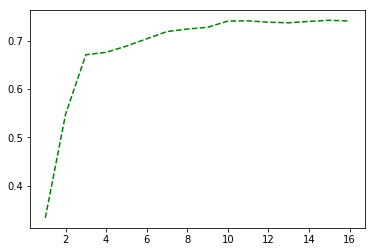

Features to select: 1
Features to select: 2
Features to select: 3
Features to select: 4
Features to select: 5
Features to select: 6
Features to select: 7
Features to select: 8
Features to select: 9
Features to select: 10
Features to select: 11
Features to select: 12
Features to select: 13
Features to select: 14
Features to select: 15
Features to select: 16
Features to select: 17
Features to select: 18
Features to select: 19
Features to select: 20
Features to select: 21
Features to select: 22
Features to select: 23
Features to select: 24
Features to select: 25
Features to select: 26
Features to select: 27
Features to select: 28
Features to select: 29
Features to select: 30
Features to select: 31
Features to select: 32
Features to select: 33
Features to select: 34
Features to select: 35
Features to select: 36
Features to select: 37
Features to select: 38
Features to select: 39
Features to select: 40
Features to select: 41
Features to select: 42
Features to select: 43
Features to select: 

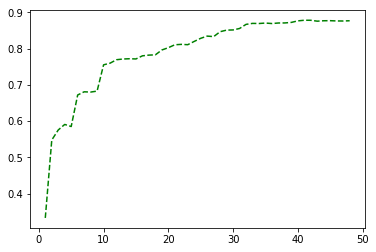

In [145]:
# SelectFromModel
def sfm_audio(estimator, thresholds, X_train, X_test, y_train, y_test):
    for threshold in thresholds:
        print('threshold: %f' % (threshold))
        sfm = SelectFromModel(estimator=estimator, threshold=threshold, prefit=True)
        X_train_sfm = sfm.transform(X_train)
        X_test_sfm = sfm.transform(X_test)
        lr = LogisticRegression(solver='sag', multi_class='multinomial').fit(X_train_sfm, y_train)
        cls_report(lr, X_test_sfm, y_test)

lr_sfm_audio = LogisticRegression(solver='sag', multi_class='multinomial').fit(X_train, y_train)
sfm_audio = SelectFromModel(estimator=lr_sfm_audio
                            , threshold=0.01, 
                            prefit=True)
# print(lr_sfm_audio.coef_)
# print(sfm_audio.get_support())

# thresholds = lr_gs_audio.best_estimator_.
# thresholds = np.linspace(0.01, 0.15, num=10)
# lr_sfm_audio = LogisticRegression(solver='sag', multi_class='multinomial').fit(X_train, y_train)
# sfm_audio(lr_sfm_audio, thresholds, X_train, X_test, y_train, y_test)

# RFE
lr_rfe = LogisticRegression(solver='sag', multi_class='multinomial')   
plot_rfe(lr_rfe, X_train, X_test, y_train, y_test)
plot_rfe(lr_rfe, X_train_moods, X_test_moods, y_train_moods, y_test_moods)

## Support Vector Machine

In [157]:
from sklearn.feature_selection import SelectKBest

In [175]:
def k_best_f1_score(estimator, X_train, X_test, y_train, y_test):
    score = []
    for k in range(1, X_train.shape[1]):
        k_best = SelectKBest(k=k)
        X_train_kbest = k_best.fit_transform(X_train, y_train)
        X_test_kbest = k_best.transform(X_test)
        estimator.fit(X_train_kbest, y_train)
        score.append((k, f1_score(y_test, estimator.predict(X_test_kbest), average='macro')))        
    return score

In [176]:
# SelectKBest
svm_audio = SVC(C=10, gamma=0.01)

k_best = SelectKBest(k = 4)
k_best.fit(X_train, y_train)
print(k_best.scores_)
X_train_k_best = k_best.transform(X_train)
print(X_train.shape)
print(X_train_k_best.shape)

svm_f1_score = k_best_f1_score(svm_audio, X_train, X_test, y_train, y_test)
# f1_score = k_best_f1_score(svm_audio, X_train_moods, X_test_moods, y_train_moods, y_test_moods)

[    6.04985558  1282.40044005    26.37714718   146.37979655  1630.53601149
  2140.78570451   317.97289203    94.66689182    40.55359719   126.09144208
   849.13473451    67.87951681  1763.59893448   103.04822889   133.55432904
   509.89744884   243.32846476]
(8943, 17)
(8943, 4)


[(1, 0.33148735953287406), (2, 0.5338112021586634), (3, 0.66714958411225422), (4, 0.67661338335000987), (5, 0.68371236445175843), (6, 0.70415817544639236), (7, 0.73106292060024947), (8, 0.73482928164991512), (9, 0.74487746025135371), (10, 0.74879331867312815), (11, 0.75925543082067637), (12, 0.76285831713804875), (13, 0.76597745740683054), (14, 0.77473470164484659), (15, 0.77310413397650057), (16, 0.77376807738217135)]


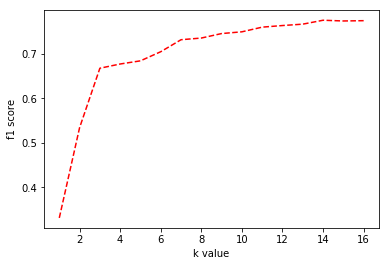

In [178]:
def plot_svm_kbest(svm_score):
    print(svm_score)
    k, score = zip(*svm_score)
    plt.plot(k, score, 'r--', label='f1_score')
    plt.xlabel('k value')
    plt.ylabel('f1 score')
    plt.show()
    
plot_svm_kbest(svm_f1_score)

## Random Forest

In [ ]:
def sfm_audio(estimator, thresholds, X_train, X_test, y_train, y_test):
    for threshold in thresholds:
        print('threshold: %f' % (threshold))
        sfm = SelectFromModel(estimator=estimator, threshold=threshold, prefit=True)
        X_train_sfm = sfm.transform(X_train)
        X_test_sfm = sfm.transform(X_test)
        lr = RandomForestClassifier(n_estimators=100, min_samples_split=4, max_features='sqrt').fit(X_train_sfm, y_train)
        cls_report(lr, X_test_sfm, y_test)
        
rf_sfm_audio = RandomForestClassifier(n_estimators=100, min_samples_split=4, max_features='sqrt').fit(X_train, y_train)
thresholds = np.sort(rf_sfm_audio.feature_importances_)
sfm_audio(rf_sfm_audio, thresholds, X_train, X_test, y_train, y_test)


Features to select: 1
Features to select: 2
Features to select: 3
Features to select: 4
Features to select: 5
Features to select: 6
Features to select: 7
Features to select: 8
Features to select: 9
Features to select: 10
Features to select: 11
Features to select: 12
Features to select: 13
Features to select: 14
Features to select: 15
Features to select: 16


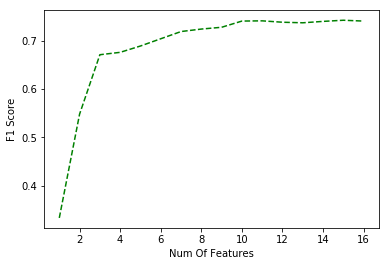

Features to select: 1
Features to select: 2
Features to select: 3
Features to select: 4
Features to select: 5
Features to select: 6
Features to select: 7
Features to select: 8
Features to select: 9
Features to select: 10
Features to select: 11
Features to select: 12
Features to select: 13
Features to select: 14
Features to select: 15
Features to select: 16
Features to select: 17
Features to select: 18
Features to select: 19
Features to select: 20
Features to select: 21
Features to select: 22
Features to select: 23
Features to select: 24
Features to select: 25
Features to select: 26
Features to select: 27
Features to select: 28
Features to select: 29
Features to select: 30
Features to select: 31
Features to select: 32
Features to select: 33
Features to select: 34
Features to select: 35
Features to select: 36
Features to select: 37
Features to select: 38
Features to select: 39
Features to select: 40
Features to select: 41
Features to select: 42
Features to select: 43
Features to select: 

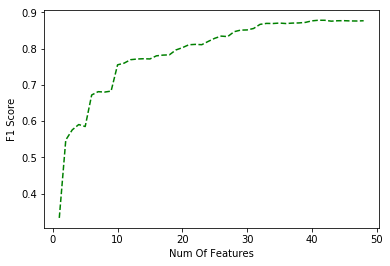

In [150]:
# RFE
rf_rfe_model = RandomForestClassifier(n_estimators=100, min_samples_split=4, max_features='sqrt')
plot_rfe(rf_rfe_model, X_train, X_test, y_train, y_test)
plot_rfe(rf_rfe_model, X_train_moods, X_test_moods, y_train_moods, y_test_moods)

In [110]:
print(rf_rfe_model.support_)
print(rf_rfe_model.ranking_)
print('4 importance features')
print(df_features.iloc[:,1:].columns[rf_rfe_model.support_])

[False False False  True  True  True False False False False False False
  True False False False False]
[12  2 10  1  1  1  3 13 14  4  6  7  1  9  8  5 11]
4 importance features
Index([u'tempo', u'speechiness', u'acousticness', u'mode'], dtype='object')


In [111]:
cls_report(rf_rfe_model, X_test, y_test)

             precision    recall  f1-score   support

      dance       0.70      0.60      0.64       642
       jazz       0.68      0.64      0.66       535
        rap       0.79      0.75      0.77       744
       rock       0.79      0.85      0.82      1912

avg / total       0.76      0.76      0.76      3833

      |    d                |
      |    a    j         r |
      |    n    a    r    o |
      |    c    z    a    c |
      |    e    z    p    k |
------+---------------------+
dance | <384>   9   88  161 |
 jazz |    8 <341>  11  175 |
  rap |   71   15 <556> 102 |
 rock |   87  140   51<1634>|
------+---------------------+
(row = reference; col = test)



# Pipeline

In [181]:
from sklearn.pipeline import Pipeline

In [185]:
kbest = SelectKBest()
pipe = [
    ('kbest', kbest),
    ('lr', LogisticRegression())
]
param_grid = {
    'kbest__k': range(1, X_train.shape[1]),
    'lr__solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
    'lr__multi_class': ['ovr', 'multinomial']
}

pipeline = Pipeline(pipe)
gs_pipeline = GridSearchCV(pipeline, param_grid=param_grid, refit=True, verbose=1, n_jobs=6)
gs_pipeline.fit(X_train, y_train)


Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   16.8s
[Parallel(n_jobs=6)]: Done 384 out of 384 | elapsed:   38.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('kbest', SelectKBest(k=10, score_func=<function f_classif at 0x7fecfa1939b0>)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=6,
       param_grid={'kbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 'lr__solver': ['newton-cg', 'sag', 'saga', 'lbfgs'], 'lr__multi_class': ['ovr', 'multinomial']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [187]:
gs_pipeline.best_params_
gs_pipeline.best_score_

0.78005143687800516

In [193]:
rfc = RandomForestClassifier()
selector = RFE(rfc)
rfc_pipe = [
    ('rfe', selector),
    ('rfc', rfc)
]
rfc_param_grid = {
    'rfe__n_features_to_select': range(1, X_train.shape[1]),
    'rfc__n_estimators': [5, 10, 100],
    'rfc__min_samples_split': [2, 3, 4, 5, 10],
    'rfc__max_features': ['sqrt', 'log2', 'auto']
}

rfc_pipeline = Pipeline(rfc_pipe)
rfc_gs_pipeline = GridSearchCV(rfc_pipeline, param_grid=rfc_param_grid, refit=True, verbose=2, n_jobs=6)
rfc_gs_pipeline.fit(X_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits
[CV] rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=1 
[CV] rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=1 
[CV] rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=1 
[CV] rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=2 
[CV] rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=2 
[CV] rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=2 
[CV]  rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=2, total=   3.9s
[CV]  rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=2, total=   4.0s
[CV] rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_featu

[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:   16.5s


[CV]  rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=12, total=   1.7s
[CV] rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=13 
[CV]  rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=12, total=   1.7s
[CV] rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=13 
[CV]  rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=12, total=   1.8s
[CV] rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=13 
[CV]  rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=11, total=   2.0s
[CV] rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=14 
[CV]  rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features

[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:  1.4min


[CV]  rfc__min_samples_split=3, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=3, total=   3.6s
[CV]  rfc__min_samples_split=3, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=3, total=   3.5s
[CV] rfc__min_samples_split=3, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=5 
[CV] rfc__min_samples_split=3, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=5 
[CV]  rfc__min_samples_split=3, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=4, total=   3.4s
[CV] rfc__min_samples_split=3, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=5 
[CV]  rfc__min_samples_split=3, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=4, total=   3.4s
[CV] rfc__min_samples_split=3, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_select=6 
[CV]  rfc__min_samples_split=3, rfc__n_estimators=5, rfc__max_features=sqrt, rfe__n_features_to_sele

[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:  3.1min


[CV]  rfc__min_samples_split=4, rfc__n_estimators=10, rfc__max_features=sqrt, rfe__n_features_to_select=8, total=   2.7s
[CV] rfc__min_samples_split=4, rfc__n_estimators=10, rfc__max_features=sqrt, rfe__n_features_to_select=9 
[CV]  rfc__min_samples_split=4, rfc__n_estimators=10, rfc__max_features=sqrt, rfe__n_features_to_select=8, total=   2.7s
[CV] rfc__min_samples_split=4, rfc__n_estimators=10, rfc__max_features=sqrt, rfe__n_features_to_select=9 
[CV]  rfc__min_samples_split=4, rfc__n_estimators=10, rfc__max_features=sqrt, rfe__n_features_to_select=7, total=   3.0s
[CV]  rfc__min_samples_split=4, rfc__n_estimators=10, rfc__max_features=sqrt, rfe__n_features_to_select=8, total=   2.8s
[CV] rfc__min_samples_split=4, rfc__n_estimators=10, rfc__max_features=sqrt, rfe__n_features_to_select=9 
[CV]  rfc__min_samples_split=4, rfc__n_estimators=10, rfc__max_features=sqrt, rfe__n_features_to_select=7, total=   3.0s
[CV]  rfc__min_samples_split=4, rfc__n_estimators=10, rfc__max_features=sqrt,

[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:  5.7min


[CV]  rfc__min_samples_split=10, rfc__n_estimators=10, rfc__max_features=sqrt, rfe__n_features_to_select=6, total=   3.1s
[CV] rfc__min_samples_split=10, rfc__n_estimators=10, rfc__max_features=sqrt, rfe__n_features_to_select=7 
[CV]  rfc__min_samples_split=10, rfc__n_estimators=10, rfc__max_features=sqrt, rfe__n_features_to_select=6, total=   3.1s
[CV] rfc__min_samples_split=10, rfc__n_estimators=10, rfc__max_features=sqrt, rfe__n_features_to_select=7 
[CV]  rfc__min_samples_split=10, rfc__n_estimators=10, rfc__max_features=sqrt, rfe__n_features_to_select=5, total=   3.3s
[CV] rfc__min_samples_split=10, rfc__n_estimators=10, rfc__max_features=sqrt, rfe__n_features_to_select=7 
[CV]  rfc__min_samples_split=10, rfc__n_estimators=10, rfc__max_features=sqrt, rfe__n_features_to_select=6, total=   3.2s
[CV]  rfc__min_samples_split=10, rfc__n_estimators=10, rfc__max_features=sqrt, rfe__n_features_to_select=5, total=   3.4s
[CV] rfc__min_samples_split=10, rfc__n_estimators=10, rfc__max_featur

[Parallel(n_jobs=6)]: Done 1001 tasks      | elapsed:  9.0min


[CV]  rfc__min_samples_split=3, rfc__n_estimators=100, rfc__max_features=log2, rfe__n_features_to_select=15, total=   3.1s
[CV] rfc__min_samples_split=4, rfc__n_estimators=5, rfc__max_features=log2, rfe__n_features_to_select=1 
[CV]  rfc__min_samples_split=3, rfc__n_estimators=100, rfc__max_features=log2, rfe__n_features_to_select=15, total=   3.1s
[CV] rfc__min_samples_split=4, rfc__n_estimators=5, rfc__max_features=log2, rfe__n_features_to_select=1 
[CV]  rfc__min_samples_split=3, rfc__n_estimators=100, rfc__max_features=log2, rfe__n_features_to_select=15, total=   3.1s
[CV] rfc__min_samples_split=4, rfc__n_estimators=5, rfc__max_features=log2, rfe__n_features_to_select=1 
[CV]  rfc__min_samples_split=3, rfc__n_estimators=100, rfc__max_features=log2, rfe__n_features_to_select=16, total=   3.3s
[CV] rfc__min_samples_split=4, rfc__n_estimators=5, rfc__max_features=log2, rfe__n_features_to_select=2 
[CV]  rfc__min_samples_split=3, rfc__n_estimators=100, rfc__max_features=log2, rfe__n_fe

[Parallel(n_jobs=6)]: Done 1446 tasks      | elapsed: 13.1min


[CV]  rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=auto, rfe__n_features_to_select=3, total=   3.5s
[CV] rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=auto, rfe__n_features_to_select=5 
[CV]  rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=auto, rfe__n_features_to_select=3, total=   3.6s
[CV] rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=auto, rfe__n_features_to_select=5 
[CV]  rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=auto, rfe__n_features_to_select=4, total=   3.4s
[CV] rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=auto, rfe__n_features_to_select=5 
[CV]  rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=auto, rfe__n_features_to_select=3, total=   3.6s
[CV] rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=auto, rfe__n_features_to_select=6 
[CV]  rfc__min_samples_split=2, rfc__n_estimators=5, rfc__max_features=auto, rfe__n_features_to_sele

[Parallel(n_jobs=6)]: Done 1973 tasks      | elapsed: 17.7min


[CV]  rfc__min_samples_split=5, rfc__n_estimators=100, rfc__max_features=auto, rfe__n_features_to_select=1, total=   5.8s
[CV] rfc__min_samples_split=5, rfc__n_estimators=100, rfc__max_features=auto, rfe__n_features_to_select=4 
[CV]  rfc__min_samples_split=5, rfc__n_estimators=100, rfc__max_features=auto, rfe__n_features_to_select=3, total=   4.9s
[CV] rfc__min_samples_split=5, rfc__n_estimators=100, rfc__max_features=auto, rfe__n_features_to_select=5 
[CV]  rfc__min_samples_split=5, rfc__n_estimators=100, rfc__max_features=auto, rfe__n_features_to_select=3, total=   4.9s
[CV]  rfc__min_samples_split=5, rfc__n_estimators=100, rfc__max_features=auto, rfe__n_features_to_select=3, total=   4.9s
[CV] rfc__min_samples_split=5, rfc__n_estimators=100, rfc__max_features=auto, rfe__n_features_to_select=5 
[CV] rfc__min_samples_split=5, rfc__n_estimators=100, rfc__max_features=auto, rfe__n_features_to_select=5 
[CV]  rfc__min_samples_split=5, rfc__n_estimators=100, rfc__max_features=auto, rfe__

[Parallel(n_jobs=6)]: Done 2160 out of 2160 | elapsed: 19.5min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('rfe', RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
        ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=6,
       param_grid={'rfc__n_estimators': [5, 10, 100], 'rfc__min_samples_split': [2, 3, 4, 5, 10], 'rfc__max_features': ['sqrt', 'log2', 'auto'], 'rfe__n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [194]:
print(rfc_gs_pipeline.best_estimator_)
print(rfc_gs_pipeline.best_params_)
print(rfc_gs_pipeline.best_score_)

Pipeline(memory=None,
     steps=[('rfe', RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
        ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])
{'rfc__min_samples_split': 3, 'rfc__n_estimators': 100, 'rfc__max_features': 'sqrt', 'rfe__n_features_to_select': 16}
0.806664430281
